# Naive Bayes (the easy way)

We'll cheat by using sklearn.naive_bayes to train a spam classifier! Most of the code is just loading our training data into a pandas DataFrame that we can play with:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

Let's have a look at that DataFrame:

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
#df = pd.read_csv('dataset.csv', encoding='latin-1')

df = pd.read_csv('convo.csv' ,header=None,error_bad_lines=False)

b'Skipping line 24: expected 2 fields, saw 3\nSkipping line 40: expected 2 fields, saw 3\nSkipping line 116: expected 2 fields, saw 3\nSkipping line 220: expected 2 fields, saw 4\n'


In [4]:
#df.drop([2, 3, 4, 5, 6, 7], axis = 1, inplace = True)
df

,0,1
0,age,how old are you
1,name,what is your name
2,name,what can i call you
3,name,tell me your name ?
4,name,what do people call you
...,...,...
212,bio_question,how are you faring today?
213,bio_question,how is yor family
214,bio_question,how is your lover
215,bio_question,sure you are good?


In [5]:
df.count() 
df.columns = ['label', 'message']

In [6]:
df['label'].count() 

217

In [50]:
# Describing the dataset containing conversaions, and question.
df.groupby('label').describe() 

message                                
               count unique                 top freq
label                                               
age               20     19    tell me your age    2
bio_question      43     39         how are you    4
good_reply        40     36           ok thanks    3
greeting          32     31            whats up    2
name              40     35   what is your name    3
task              42     34     what can you do    3

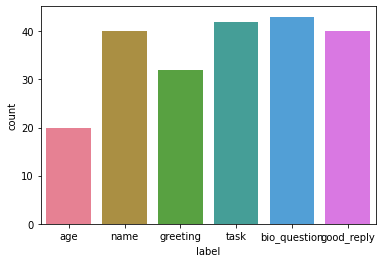

In [51]:
sns.countplot(data=df, x='label')
plt.show() 

In [52]:
df.head(1000) 

,label,message
0,age,how old are you
1,name,what is your name
2,name,what can i call you
3,name,tell me your name ?
4,name,what do people call you
...,...,...
212,bio_question,how are you faring today?
213,bio_question,how is yor family
214,bio_question,how is your lover
215,bio_question,sure you are good?


In [7]:
# Cleaning the text
import string 
# from nltk.corpus import stopwords 
from nltk import PorterStemmer as Stemmer
def process(text):
    # turn the texts into lowercase
    text = text.lower() 
    # remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # remove stopwords 
    # text = [t for t in text.split() if t not in stopwords.words('english')]
    # Stemming the words 
    stemmer = Stemmer() 
    text = [stemmer.stem(t) for t in text]
    # Return the token list 
    return text 

Let's try it out:

In [8]:
# 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer(analyzer = process)

In [57]:

data = tfidfv.fit_transform(df['message'])

In [58]:
mess_id = df.iloc[2]['message']
print(mess_id)

 what can i call you


In [59]:
print(tfidfv.transform([mess_id]))

  (0, 24)	0.13906616800425312
  (0, 22)	0.15426283238327868
  (0, 20)	0.14041994078242928
  (0, 19)	0.14968557422913192
  (0, 15)	0.11788572613307957
  (0, 14)	0.15905472636373075
  (0, 12)	0.38076831476261713
  (0, 9)	0.17305378048618072
  (0, 8)	0.1252501768774383
  (0, 3)	0.5410553255119263
  (0, 1)	0.3619673090134598
  (0, 0)	0.5110417525219209


In [7]:
## Building a model 
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import MultinomialNB 
model = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)),
     ('classifier', MultinomialNB())
    
])

In [61]:
# performing a training and a spliting test 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.20, random_state = 21)

In [62]:
# Training the Spam filter 
model.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer=<function process at 0x78304704d9d8>)),
                ('classifier', MultinomialNB())])

In [63]:
predictions = model.predict(x_test)
model.score(x_test, y_test)

0.5681818181818182

In [65]:
value = ['hello, how far', 'can you find out who that person is?']
for i in value:
    detect_conversation(i)

task
good_reply


In [66]:
# Saving the pickle file into memory 
import pickle 
filename = 'question_model.pkl'

In [67]:
# save the model to disk
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.5681818181818182


In [68]:
# Saving the model to disk using numpy 
np.save('model.npy', model) 

In [69]:
import joblib 

# save the model to disk
filename = 'finalized_model'
joblib.dump(model, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

0.5681818181818182


In [9]:
import joblib
# save the model to disk
filename = 'finalized_model'
 
# load the model from disk
model = joblib.load(filename)

In [10]:
model.predict(['what can you do ?'])[0]

'task'

In [23]:
! pip install joblib